# 2x2 fuel assembly

This example shows the basic functionality of feign by defining a 2x2 fuel assembly (rods made of UO2 in cladding), and one detector point facing the corner. Two cases will be computed, one when the source points are the center of the pins, and one one 10 random points are sampled in each pin as source locations. In such geometry the distance travelled in the rod can be simply calculated by hand. Nevertheless, keep in mind that for this given example feign gives a fairly bad estimate of the point flux, since the buildup factor is not negligible in a case when the detector is very close to an uncollimated source.

Let's import feign first.

In [1]:
from feign.geometry import *
from feign.blocks import *

## Materials

Then, define four Material() objects, water and uranium-dioxide, zirconium and helium.

In [2]:
uo2=Material('1')
uo2.set_density(10.5) #g/cm3

he=Material('2')
he.set_density(0.00561781)


zr=Material('3')
zr.set_density(6.52)


h2o=Material('4')
h2o.set_density(1.0)


## Pins

In this example we assume that we are going to have only one pin type, the fuel pin. The uranium-dioxide region has 0.5 cm radius, that is followed by an 0.01 cm thick helium gap, and finally an 0.1 cm thick zirconium cladding. 

In [3]:
fuel=Pin('1')
fuel.add_region(uo2,0.5) #cm
fuel.add_region(he,0.51)
fuel.add_region(zr,0.61)


## Assembly

Now we can build a 2x2 assembly from the pin. We need to set the pitch of the lattice, the source, and the coolant. And we have to define a fuelmap based on the pinIDs. (Since there is no pool in the problem, we do not need to set anything else.)

Note the middle of the assembly is always considered as being placed at (0,0).


In [4]:
assy=Assembly(2,2)
assy.set_pitch(1.3)
assy.set_source(uo2)
assy.set_coolant(h2o)
assy.set_pins(fuel)

fuelmap=[['1','1'],
         ['1','1']]


assy.set_fuelmap(fuelmap)

## Detector

At least one detector has to be defined in the problem. Let us place one at (3,3), facing the corner of the assembly

In [5]:
det=Detector('D')
det.set_location(Point(3, 3))


## Experiment

Finally we re ready to perform define our experiment.

In [6]:
ex1=Experiment()
ex1.set_assembly(assy)
ex1.set_detectors(det)
ex1.set_materials(uo2,he,zr,h2o)


We can plot the geometry with the Plot() method. If the color attribute is set previously for the materials, then it is used for the plot, otherwise, the method will randomly assign colours for each material.

No absorbers in the problem


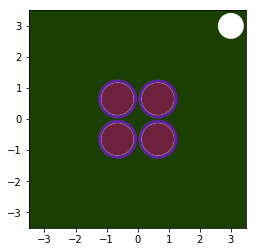

In [7]:
ex1.Plot(dpi=600,out=None,xl=[-3.5,3.5],yl=[-3.5,3.5],detectorSize=0.4)

One may change the color of any material for plotting.

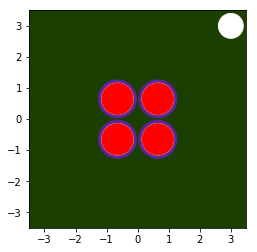

In [8]:
uo2.set_color('#FF0000')
ex1.Plot(dpi=600,out=None,xl=[-3.5,3.5],yl=[-3.5,3.5],detectorSize=0.4)

When we run the experiment, we get some warnings, because we have not set any pool, any absorbers, and the energy vector (elines) is also missing, thus only the distance travelled can be computed.

In [9]:
ex1.Run()

#0 is being calculated
Distance travelled to detector D is being calculated


## Plotting the results

First let's just print the distance travelled by the ray to the detector. from each pin We would expect, that it travelles one radius from the pins close to the detector, and three radius from the pin farther from the detector. Indeed, this is what we see.

Visualizing the data is not that interesting for this example.

In [10]:
ex1.dTmap['D']['1'] #to detector D, through matID '1'

array([[0.5, 0.5],
       [1.5, 0.5]])

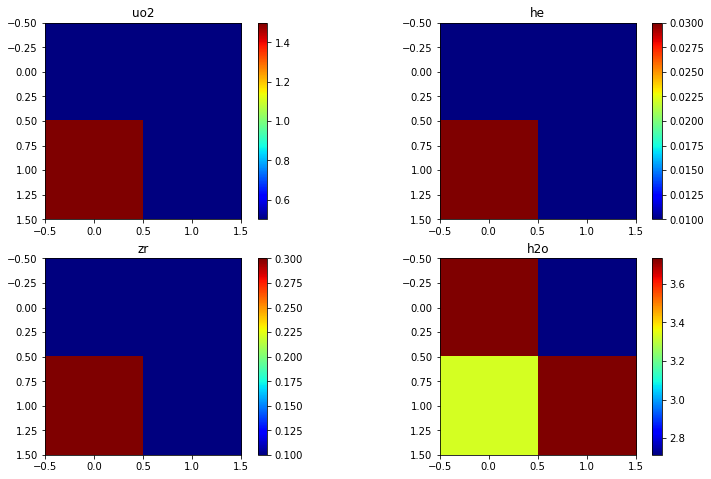

In [11]:
plt.figure()
plt.subplot(221)
plt.imshow(ex1.dTmap['D']['1'],cmap='jet')
plt.title('uo2')
plt.colorbar()

plt.subplot(222)
plt.imshow(ex1.dTmap['D']['2'],cmap='jet')
plt.title('he')
plt.colorbar()

plt.subplot(223)
plt.imshow(ex1.dTmap['D']['3'],cmap='jet')
plt.title('zr')
plt.colorbar()

plt.subplot(224)
plt.imshow(ex1.dTmap['D']['4'],cmap='jet')
plt.title('h2o')
plt.colorbar()
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.6)

plt.show()

## Computing the geometric efficiency

In order to calculate the geometric efficiency, we will need to set the path to the attenuation data, set energy lines, where the efficiency needs to be evaluated at and then rerun the experiment.

In [12]:
uo2.set_path(('/data/UO2.dat',1))
he.set_path(('/data/He.dat',1))
zr.set_path(('/data/Zr.dat',1))
h2o.set_path(('/data/H2O.dat',1))

elines=['0.5','0.6','0.8','1.0','1.5','2.0']
ex1.set_elines(elines)

In [13]:
ex1.Run()

#0 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is calculated...
...for gamma energy 0.5 MeV
...for gamma energy 0.6 MeV
...for gamma energy 0.8 MeV
...for gamma energy 1.0 MeV
...for gamma energy 1.5 MeV
...for gamma energy 2.0 MeV


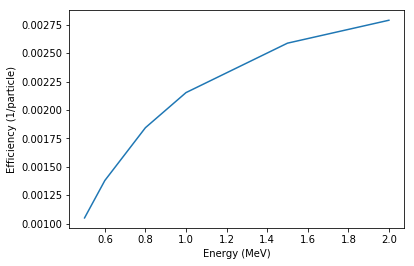

In [14]:
plt.figure()
plt.plot(ex1.elines,ex1.geomEff['D'])
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency (1/particle)')
plt.show()

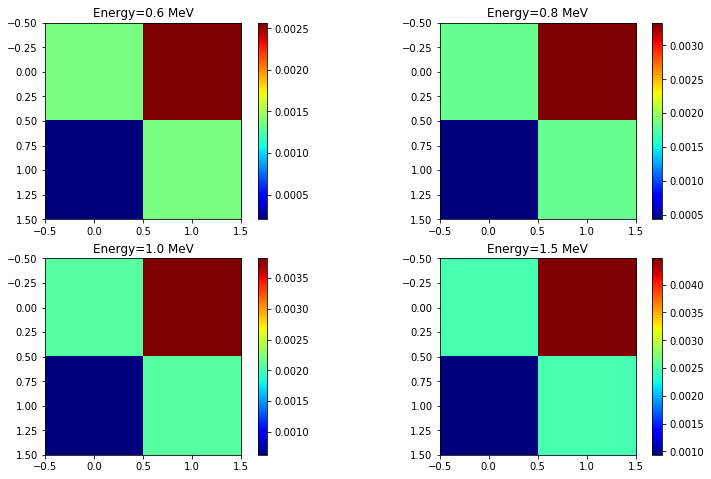

In [15]:
plt.figure()
plt.subplot(221)
plt.imshow(ex1._contributionMapAve['0.6'],cmap='jet')
#Same as plt.imshow(ex1._contributionMap['D']['0.6'],cmap='jet')
plt.title('Energy=0.6 MeV')
plt.colorbar()

plt.subplot(222)
plt.imshow(ex1._contributionMapAve['0.8'],cmap='jet')
plt.title('Energy=0.8 MeV')
plt.colorbar()

plt.subplot(223)
plt.imshow(ex1._contributionMapAve['1.0'],cmap='jet')
plt.title('Energy=1.0 MeV')
plt.colorbar()

plt.subplot(224)
plt.imshow(ex1._contributionMapAve['1.5'],cmap='jet')
plt.title('Energy=1.5 MeV')
plt.colorbar()
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.6)

plt.show()

## Random source locations

In the following the number of random source locations will be defined as well, and the geometric efficiency is compared for the the two case.

We can see that for this close detector setup, the random locations result in a relatively large standard deviation, and the center source case is well aligned with the average geometric efficiency.

In [16]:
ex1rand=Experiment()
ex1rand.set_assembly(assy)
ex1rand.set_detectors(det)
ex1rand.set_materials(uo2,he,zr,h2o)
ex1rand.set_elines(elines)
ex1rand.set_random(10)
ex1rand.Run()

No absorbers in the problem
#0 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is calculated...
...for gamma energy 0.5 MeV
...for gamma energy 0.6 MeV
...for gamma energy 0.8 MeV
...for gamma energy 1.0 MeV
...for gamma energy 1.5 MeV
...for gamma energy 2.0 MeV
#1 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is calculated...
...for gamma energy 0.5 MeV
...for gamma energy 0.6 MeV
...for gamma energy 0.8 MeV
...for gamma energy 1.0 MeV
...for gamma energy 1.5 MeV
...for gamma energy 2.0 MeV
#2 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is calculated...
...for gamma energy 0.5 MeV
...for gamma energy 0.6 MeV
...for gamma energy 0.8 MeV
...for gamma energy 1.0 MeV
...for gamma energy 1.5 MeV
...for gamma energy 2.0 MeV
#3 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is ca

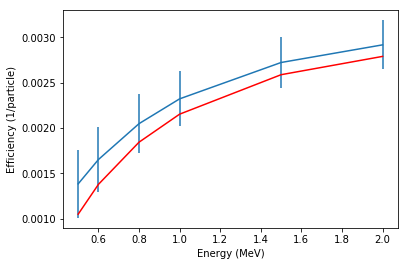

In [17]:
plt.figure()
plt.errorbar(ex1rand.elines,ex1rand.geomEffAve,ex1rand.geomEffAveErr)
plt.plot(ex1.elines,ex1.geomEffAve,'r')
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency (1/particle)')
plt.show()